In [1]:
import pandas as pd
import numpy as np
import glob
import dropbox as db
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import seaborn as sns
from soccer_pitch import full_pitch, half_pitch

# Instat XML

In [2]:
import xmltodict
import json
import xml.etree.ElementTree as etree

# Field dimension on Instat 105 x 68 y
source_data = '/Users/matthiashugli/Dropbox/bucket/sample-data/23-10-2021--Switzerland--Credit-Suisse-Super-LeagueYoung-Boys-3-2-Lausanne-Sport20220220-76331-1ahfybv.xml'
large_data = '/Users/matthiashugli/Dropbox/bucket/sample-data/23-10-2021--Switzerland--Credit-Suisse-Super-LeagueYoung-Boys-3-2-Lausanne-Sport20220119-89784-gbgtk8.xml'
filtered_export = '/Users/matthiashugli/Dropbox/bucket/super-league-stats/13-02-2022--Switzerland--Credit-Suisse-Super-LeagueZurich-3-0-Lugano20220224-15161-1pjrfk1.xml'
servette = '/Users/matthiashugli/Dropbox/bucket/super-league-stats/20-02-2022--Switzerland--Credit-Suisse-Super-LeagueServette-1-1-Luzern20220225-78204-1s38f86.xml'
#filtered_export = '/Users/matthiashugli/Dropbox/bucket/sample-data/13-02-2022--Switzerland--Credit-Suisse-Super-LeagueZurich-3-0-Lugano20220217-48763-1if7ja.xml'

filelocation = '/Users/matthiashugli/Dropbox/bucket/super-league-stats/*.xml'

all_events = []
for filename in glob.glob(filelocation):
    prstree = etree.parse(filename)
    root = prstree.getroot()

    event_items = []
    event_subitems = []
    header = ['start', 'end', 'player', 'x_pos', 'y_pos', 'team', 'action', 'half']

    for r in root.iter('ALL_INSTANCES'):
        for inst in r.iter('instance'):
        
            start = inst.find('start').text
            end = inst.find('end').text
            player = inst.find('code').text

            if inst.find('pos_x') != None:
                x_pos = inst.find('pos_x').text
                y_pos = inst.find('pos_y').text
            
            event_items = [start, end, player, x_pos, y_pos]
            
            for label in inst.iter('label'):
                labels = label.find('text').text
                event_items.append(labels)

            all_events.append(event_items)

df = pd.DataFrame(all_events, columns=header)

In [3]:
data_types_dict = {'start': float, 'end': float, 'x_pos': float, 'y_pos': float}
df = df.astype(data_types_dict)

In [4]:
#df[df['action'].isin(['Shot into the bar/post', 'Own goal'])]
df[615:635]
#df[df['start'] == 2940.65]

,start,end,player,x_pos,y_pos,team,action,half
615,2928.15,2948.15,34. Birama Ndoye,37.0,60.9,Sion,Passes accurate,2nd half
616,2932.82,2952.82,32. Loris Benito Souto,36.5,67.0,Sion,Passes accurate,2nd half
617,2934.71,2954.71,9. Dejan Sorgic,79.7,14.3,Luzern,Picking-ups,2nd half
618,2934.71,2954.71,9. Dejan Sorgic,79.7,14.3,Luzern,Passes accurate,2nd half
619,2936.10,2956.10,10. Samuele Campo,73.4,16.8,Luzern,Passes accurate,2nd half
620,2940.65,2960.65,39. Nathanael Saintini,6.8,23.9,Sion,Interceptions,2nd half
621,2940.65,2960.65,19. Filip Ugrinic,96.9,46.6,Luzern,Shots,2nd half
622,2967.50,2987.50,19. Filip Ugrinic,105.0,68.0,Luzern,Passes (inaccurate),2nd half
623,2969.12,2989.12,34. Birama Ndoye,6.4,33.8,Sion,Interceptions,2nd half
624,2973.07,2993.07,2. Mohamed Drager,68.1,35.1,Luzern,Picking-ups,2nd half


In [5]:
# Action variables
shot_outcome_actions = ['Wide shot', 'Shot on target', 'Shot into the bar/post', 'Goals']
goal_situations = ['Assists', 'Goals', 'Free-kick attacks', 'penalty attack']
gk_actions = ['Wide shot (Goalkeepers)', 'Shot on target (saved)', 'Goals conceded']

In [6]:
shots = df[df['action'] == 'Shots'].reset_index()

action_before_shots = df.reset_index()
action_before_shots.rename(columns={'index': 'id'}, inplace=True)

for i in range(1, 5):
    action_before_shots['action-' + str(i)] = action_before_shots.id.shift(i)
    action_before_shots['action+' + str(i)] = action_before_shots.id.shift(-i)

melt_actions = pd.melt(action_before_shots, id_vars=action_before_shots.iloc[:,:8], value_vars=action_before_shots.iloc[:,9:])
melt_actions = melt_actions[melt_actions['action'] == 'Shots']
melt_actions.dropna(subset=['value'], inplace=True)
melt_actions.merge(action_before_shots, left_on='value', right_on='id')
melt_actions['value'] = melt_actions['value'].astype('int64')
merge_actions = melt_actions.merge(action_before_shots, left_on='value', right_on='id').reset_index()

merge_actions['time_diff'] = (merge_actions['start_y'] - merge_actions['start_x'])
merge_actions['field_progression'] = merge_actions['x_pos_x'] - merge_actions['x_pos_y']

last_action = merge_actions[(merge_actions['time_diff'] <= 0) & \
                         (~merge_actions['action_y'].isin(shot_outcome_actions)) & \
                         (merge_actions['team_x'] == merge_actions['team_y'])] \
        .sort_values(by=['id_x', 'time_diff']).drop_duplicates(subset=['id_x'], keep='last')

gk_action = merge_actions[merge_actions['action_y'].isin(['Wide shot (Goalkeepers)', 'Shot on target (saved)'])].sort_values(by=['id_x'])

shot_creation = shots.merge(last_action[['id_x', 'x_pos_y', 'y_pos_y', 'action_y', 'time_diff']], how='left', left_on='index', right_on='id_x')
shot_creation = shot_creation.merge(gk_action[['id_x', 'team_y', 'action_y', 'player_y']], how='left', left_on='index', right_on='id_x').drop(columns=['index', 'half', 'id_x_x', 'id_x_y']) \
    .rename(columns={'team': 'attacking_team', 'x_pos_y': 'x_pos_ass', 'y_pos_y': 'y_pos_ass', 'team_y': 'defending_team', 'player_y': 'goalkeeper', 'action_y_x': 'action', 'action_y_y': 'outcome_gk', 'action': 'outcome'})

In [7]:
goals = df[df['action'] == 'Goals'].reset_index()

action_before_goals = df.reset_index()
action_before_goals.rename(columns={'index': 'id'}, inplace=True)

for i in range(1, 5):
    action_before_goals['action-' + str(i)] = action_before_goals.id.shift(i)
    action_before_goals['action+' + str(i)] = action_before_goals.id.shift(-i)

melt_goals = pd.melt(action_before_goals, id_vars=action_before_goals.iloc[:,:8], value_vars=action_before_goals.iloc[:,9:])
melt_goals = melt_goals[melt_goals['action'] == 'Goals']
melt_goals.dropna(subset=['value'], inplace=True)
melt_goals.merge(action_before_goals, left_on='value', right_on='id')
melt_goals['value'] = melt_goals['value'].astype('int64')
merge_goals = melt_goals.merge(action_before_goals, left_on='value', right_on='id').reset_index()

merge_goals['time_diff'] = np.where(merge_goals['start_y'] - merge_goals['start_x'] > 0, \
                                    (merge_goals['start_y'] - merge_goals['start_x']) * -1, \
                                    merge_goals['start_y'] - merge_goals['start_x'])
merge_goals['field_progression'] = merge_goals['x_pos_x'] - merge_goals['x_pos_y']

last_action = merge_goals[(merge_goals['action_y'].isin(goal_situations)) & \
                         (merge_goals['team_x'] == merge_goals['team_y'])] \
        .sort_values(by=['id_x', 'time_diff'], ascending=True).drop_duplicates(subset=['id_x'], keep='last')

gk_action = merge_goals[merge_goals['action_y'] == 'Goals conceded'].sort_values(by=['id_x'])

goal_creation = goals.merge(last_action[['id_x', 'x_pos_y', 'y_pos_y', 'action_y', 'time_diff']], how='left', left_on='index', right_on='id_x')
goal_creation = goal_creation.merge(gk_action[['id_x', 'team_y', 'action_y', 'player_y']], how='left', left_on='index', right_on='id_x').drop(columns=['index', 'half', 'id_x_x', 'id_x_y']) \
    .rename(columns={'team': 'attacking_team', 'x_pos_y': 'x_pos_ass', 'y_pos_y': 'y_pos_ass', 'team_y': 'defending_team', 'player_y': 'goalkeeper', 'action_y_x': 'action', 'action_y_y': 'outcome_gk', 'action': 'outcome'})

In [8]:
shot_creation.head()

,start,end,player,x_pos,y_pos,attacking_team,outcome,x_pos_ass,y_pos_ass,action,time_diff,defending_team,outcome_gk,goalkeeper
0,911.64,931.64,30. Ardon Jashari,78.5,46.0,Luzern,Shots,74.3,47.1,Interceptions,-1.71,Sion,Shot on target (saved),18. Kevin Fickentscher
1,1386.99,1406.99,15. Marvin Schulz,95.4,49.0,Luzern,Shots,89.2,49.3,Picking-ups,-1.05,NaN,NaN,NaN
2,1741.10,1761.10,19. Filip Ugrinic,90.5,32.3,Luzern,Shots,92.1,41.6,Passes accurate,-1.59,Sion,Wide shot (Goalkeepers),18. Kevin Fickentscher
3,1789.10,1809.10,9. Dejan Sorgic,82.8,27.7,Luzern,Shots,82.8,27.7,Picking-ups,0.00,Sion,Wide shot (Goalkeepers),18. Kevin Fickentscher
4,2047.36,2067.36,10. Samuele Campo,79.1,31.9,Luzern,Shots,74.5,20.0,Picking-ups,-2.29,Sion,Shot on target (saved),18. Kevin Fickentscher


In [9]:
goal_creation.head()

,start,end,player,x_pos,y_pos,attacking_team,outcome,x_pos_ass,y_pos_ass,action,time_diff,defending_team,outcome_gk,goalkeeper
0,3557.61,3607.61,21. Asumah Abubakar-Ankra,101.1,30.5,Luzern,Goals,98.6,12.8,Assists,-1.44,Sion,Goals conceded,18. Kevin Fickentscher
1,3261.18,3311.18,29. Chris Vianney Bedia,95.9,39.2,Servette,Goals,85.4,39.6,Assists,-1.81,Luzern,Goals conceded,32. Marius Muller
2,5277.21,5327.21,27. Marko Kvasina,97.2,32.6,Luzern,Goals,94.3,61.7,Assists,-1.56,Servette,Goals conceded,32. Jeremy Frick
3,958.21,1008.21,19. Zan Celar,93.1,41.4,Lugano,Goals,76.2,8.8,Assists,-3.50,Grasshopper,Goals conceded,1. Andre Moreira
4,4334.36,4384.36,19. Zan Celar,92.2,19.0,Lugano,Goals,NaN,NaN,NaN,NaN,Grasshopper,Goals conceded,1. Andre Moreira


In [10]:
chance_creation = pd.concat([shot_creation, goal_creation]).reset_index()
passing = chance_creation[chance_creation['action'].isin(['Passes accurate', 'Passes (inaccurate)', 'Assists'])]
passing_deviation = passing['time_diff'].mean() + (passing['time_diff'].std() * -3)
passing = passing[passing['time_diff'] >= passing_deviation]
passing.to_csv('/Users/matthiashugli/Dropbox/bucket/super-league-stats/chance_creation_passes.csv')

In [54]:
goal_percentage = chance_creation.groupby(['attacking_team', 'outcome']).agg({'index': 'count'}).reset_index() \
    .pivot(index='attacking_team', columns='outcome', values='index').reset_index()
goal_percentage['goal_perc'] = (goal_percentage['Goals'] / goal_percentage[['Goals', 'Shots']].sum(axis=1) * 100) \
    .round(decimals=0).astype(int).astype(str) + '%'
goal_percentage

outcome,attacking_team,Goals,Shots,goal_perc
0,Basel,16,74,18%
1,Grasshopper,8,63,11%
2,Lausanne Sport,2,68,3%
3,Lugano,6,70,8%
4,Luzern,7,89,7%
5,Servette,8,86,9%
6,Sion,9,55,14%
7,St. Gallen,20,86,19%
8,Young Boys,14,96,13%
9,Zurich,16,93,15%


In [60]:
pass_percentage = chance_creation.groupby(['attacking_team', 'action']).agg({'index': 'count'}).reset_index().pivot(index='attacking_team', columns='action', values='index').reset_index()
pass_percentage['total_chances'] = pass_percentage.iloc[:, 1:].sum(axis=1).astype(int)
pass_percentage['setup_chances'] = pass_percentage.iloc[:, [1,6,7]].sum(axis=1)
pass_percentage['setup_perc'] = (pass_percentage['setup_chances'] / pass_percentage['total_chances'] * 100).round(decimals=0) \
    .astype(int).astype(str) + '%'
pass_percentage = pass_percentage[['attacking_team', 'total_chances', 'setup_perc']].reset_index()
pass_percentage

action,index,attacking_team,total_chances,setup_perc
0,0,Basel,88,62%
1,1,Grasshopper,71,65%
2,2,Lausanne Sport,70,51%
3,3,Lugano,74,64%
4,4,Luzern,96,70%
5,5,Servette,93,75%
6,6,Sion,61,70%
7,7,St. Gallen,102,71%
8,8,Young Boys,105,71%
9,9,Zurich,105,56%


In [64]:
team_stat = pass_percentage.merge(goal_percentage, how='left', left_on='attacking_team', right_on='attacking_team').reset_index()
team_stat.drop(columns=['index', 'level_0'], inplace=True)

In [20]:
shot_outcome = df[df['action'].isin(shot_outcome_actions)].reset_index()
shot_outcome.rename(columns={'index': 'id'}, inplace=True)
# print(len(shot_creation))
# # print(shot_creation['id_x'].nunique())
# print(len(goal_creation))
# print(goal_creation['id_x'].nunique())
#goal_creation.tail(20)
#df[df['action'].isin(shot_outcome_actions)].count()

merge_outcome = chance_creation.merge(shot_outcome, how='left', left_on='id_x', right_on='id', suffixes=(False, '_outcome'))
merge_outcome[merge_outcome['start_outcome'].isna()][['id_x']].head()

KeyError: 'id_x'

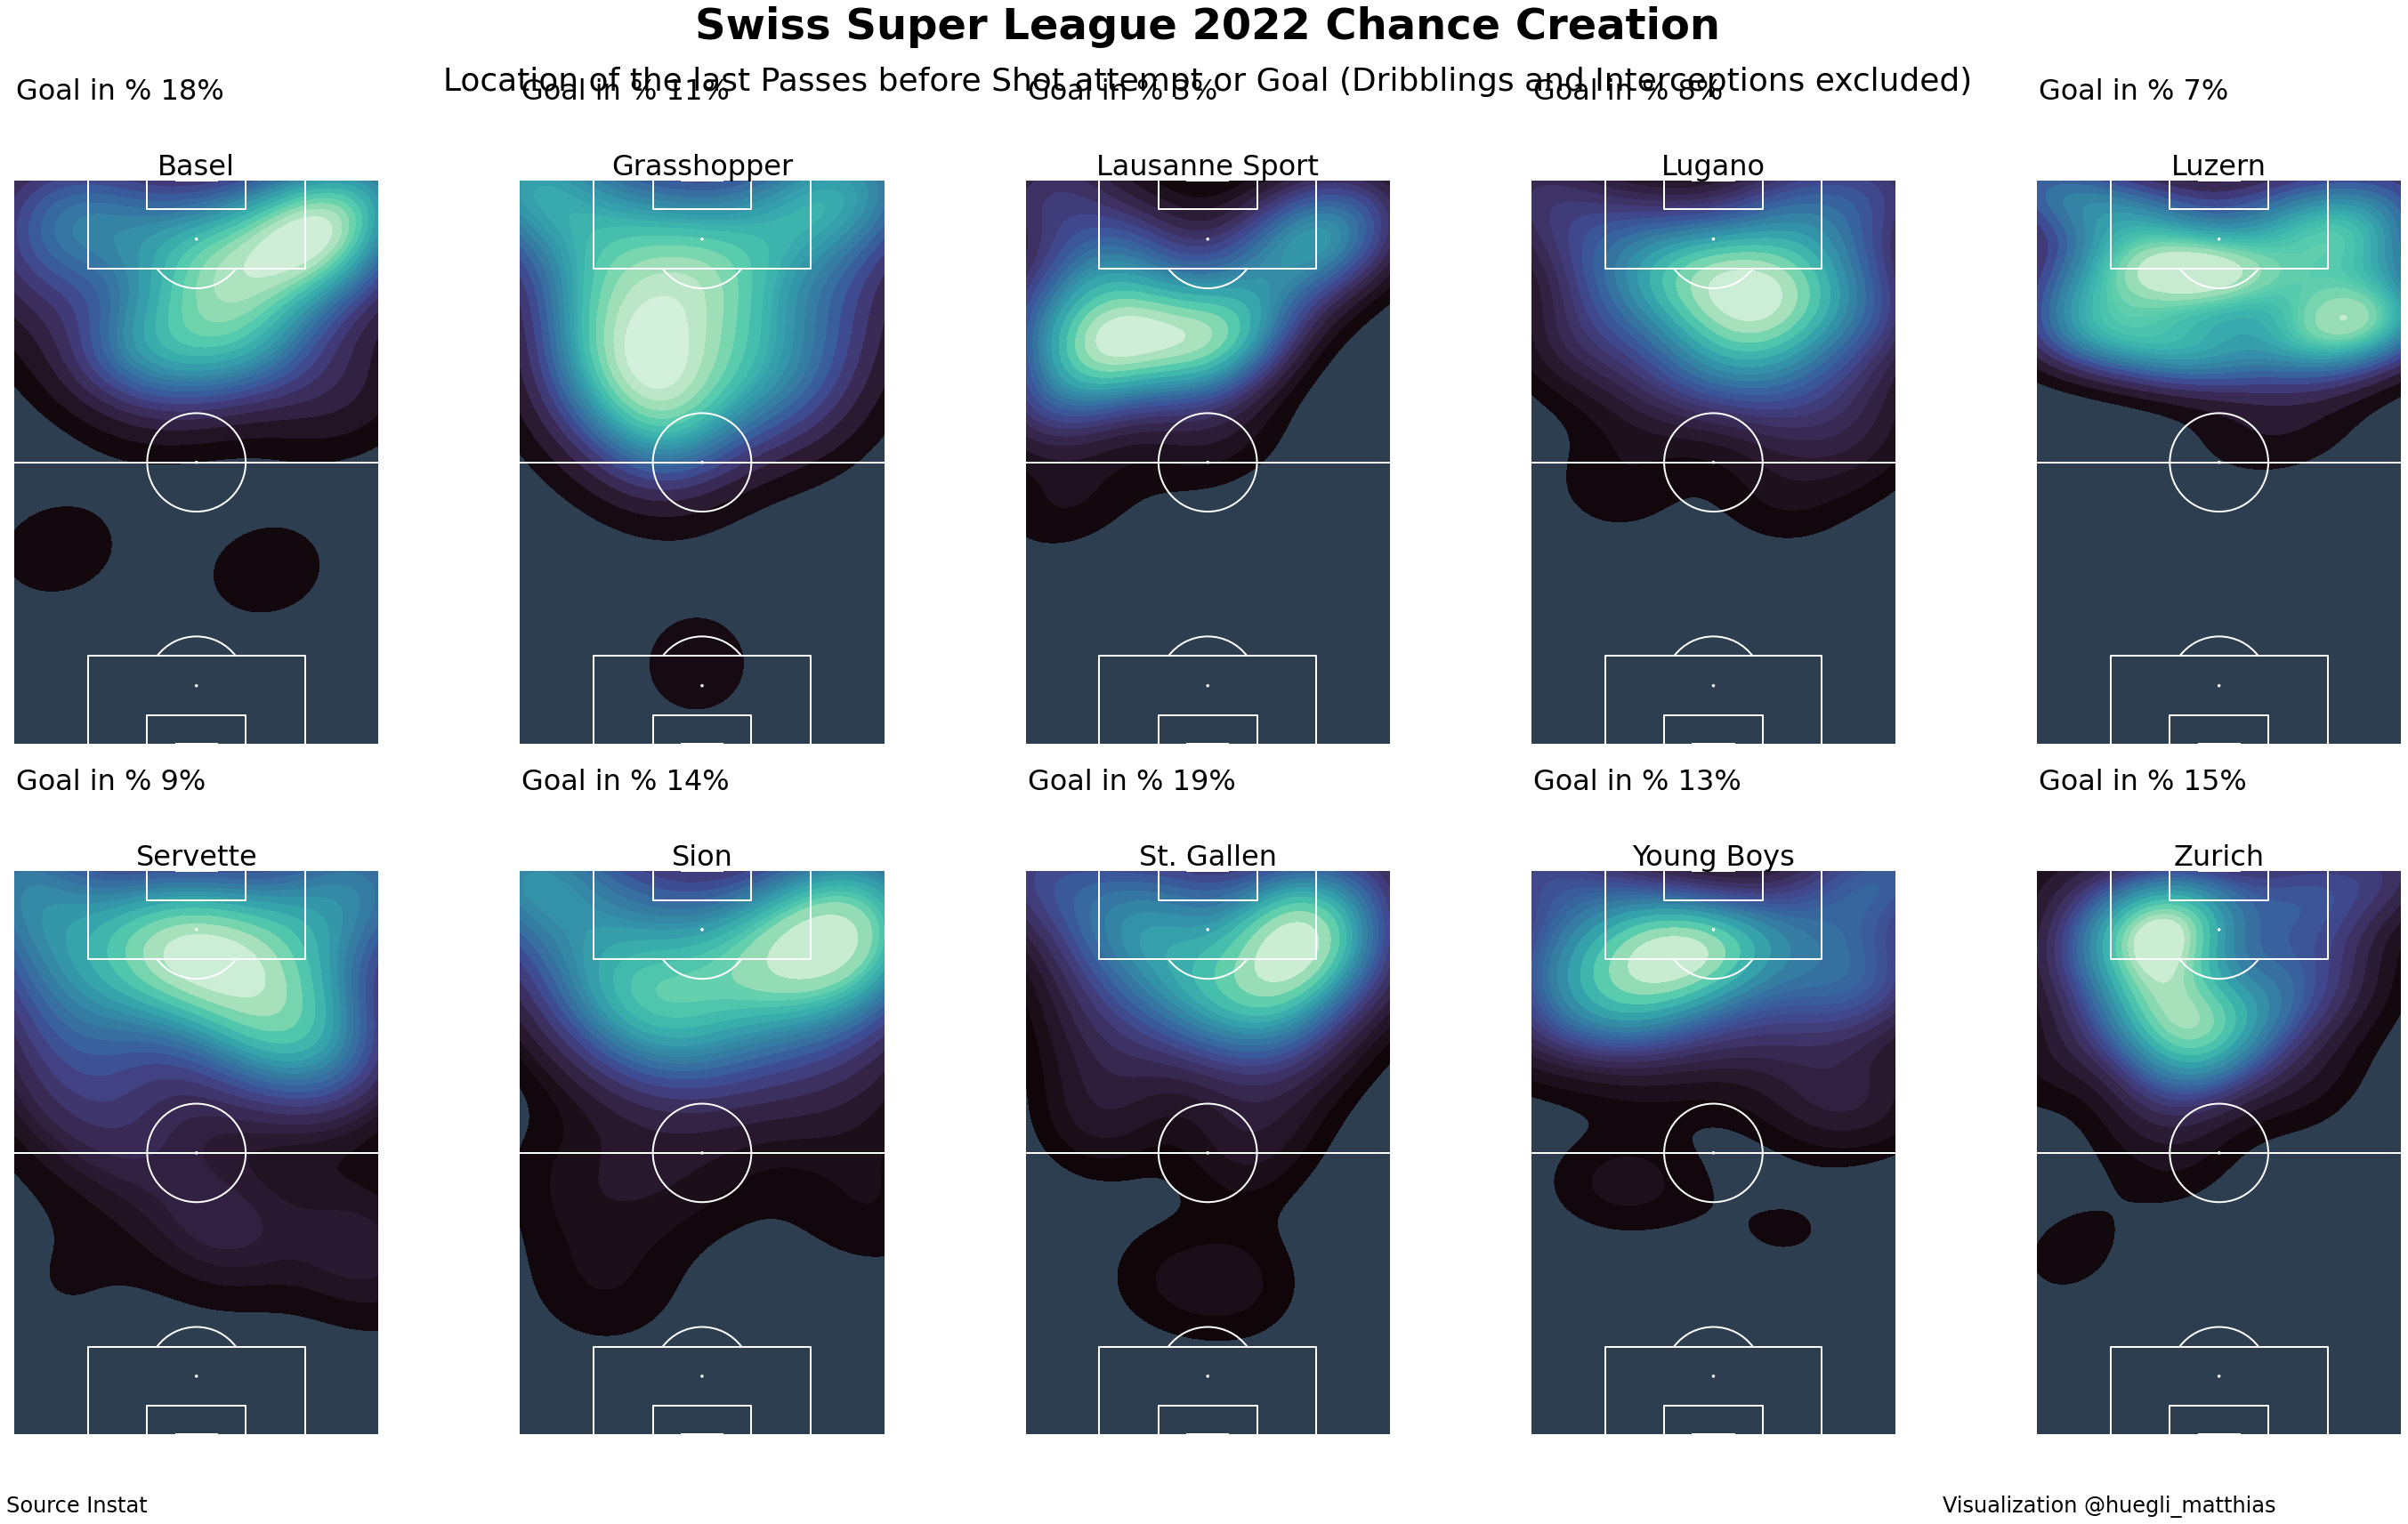

In [76]:
from mplsoccer import VerticalPitch
from matplotlib.colors import LinearSegmentedColormap

pearl_earring_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                       ['#15242e', '#4393c4'], N=10)

team_stat = pass_percentage.merge(goal_percentage, how='left', left_on='attacking_team', right_on='attacking_team').reset_index()
team_stat.drop(columns=['index', 'level_0'], inplace=True)
passing['x_pos_assist'] = passing['y_pos_ass']
passing['y_pos_assist'] = passing['x_pos_ass']

pitch = VerticalPitch(pitch_color='#2C3E50', line_color='#FFFFFF', pitch_type='uefa', line_zorder=2)
fig, axes = pitch.grid(nrows=2, ncols=5, space=0.1, figheight=20,
                      title_height=0, endnote_height=0,  # no title/ endnote
                      grid_width=0.9, grid_height=0.98, bottom=0.01, left=0.05)
for i, ax in enumerate(axes['pitch'].flat):
    ax.set(xlim=(0,68), ylim=(0,105))
    sns.kdeplot(data=passing[passing['attacking_team'] == team_stat['attacking_team'][i]], x='x_pos_assist', y='y_pos_assist', fill=True, ax=ax, shade=True, levels=20, cmap='mako')
    #hexbin = pitch.hexbin(passing['x_pos_assist'], passing['y_pos_assist'], edgecolors='#122c3d', ax=ax, gridsize=(8, 8), cmap=pearl_earring_cmap)
    ax.set_title(team_stat['attacking_team'][i], fontsize=32)
    ax.text(0.5, 120, 'Goal in % ' + team_stat['goal_perc'][i], fontsize=32)
fig.text(0.5, 1.1, 'Swiss Super League 2022 Chance Creation', ha='center', fontsize=48, fontweight='bold')
fig.text(0.5, 1.06, 'Location of the last Passes before Shot attempt or Goal (Dribblings and Interceptions excluded)', ha='center', fontsize=36)
fig.text(0.05, -0.05, 'Source Instat', ha='left', fontsize=24)
fig.text(0.9, -0.05, 'Visualization @huegli_matthias', ha='right', fontsize=24)

plt.show()